# Homework4

1. Using the sat data set, fit a model with the total SAT score as the response and expend, salary, ratio and takers as predictors. Perform regression diagnostics on this model to answer the questions below. Display any plots that are relevant but do not provide plots about which you have nothing to say. Suggest possible improvements or corrections where appropriate.


a. Check the constant variance assumption for the errors;

In [1]:
import pandas as pd
from sklearn import linear_model
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence as influence
import numpy as np

In [2]:
sat = pd.read_csv('sat.csv')
X = sat[['expend', 'salary','ratio','takers']]
y = sat['total']

In [3]:
X_c = sm.add_constant(X)
model = sm.OLS(y, X_c).fit()
y_pred = model.predict(X_c)
model.summary()














<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     52.88
Date:                Fri, 06 May 2022   Prob (F-statistic):           1.92e-16
Time:                        09:28:06   Log-Likelihood:                -242.68
No. Observations:                  50   AIC:                             495.4
Df Residuals:                      45   BIC:                             504.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1045.9715     52.870     19.784      0.000     939.486    1152.457
expend         4.4626     10.547      0.423      0.674     -16.779      25.704
salary         1.6379      2.387      0.686      0.496      -3.170       6.446
ratio         -3.6242      3.215     -1.127      0.266     -10.100       2.852
takers        -2.9045      0.231    -12.559      0.000      -3.370      -2.439
==============================================================================
Omnibus:                        1.325   Durbin-Watson:                   2.452
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.572
Skew:                          -0.014   Prob(JB):                        0.751
Kurtosis:                       3.523   Cond. No.                         654.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

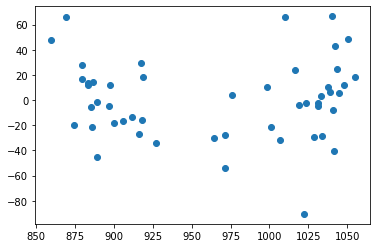

In [4]:
error = (y-y_pred).to_numpy()

plt.scatter(y_pred,error)

the constant variance assumption for the errors is not met since the residual plot is a curve. The mean of the residual is not 0. Residuals are positive or negative depending on the value of x.

b. Check the normality assumption;

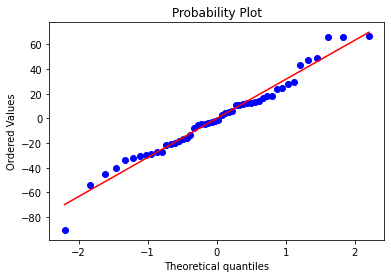

In [6]:
stats.probplot(error, dist="norm", plot=plt)
plt.show()

The approximately straight line verifies the normality for the errors.

c. Check for large leverage points;

In [7]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
#point with high leverage = (2k+2)/n = 10/50= 0.2
high_leverage = sat[abs(leverage) > 0.2]
high_leverage

,Unnamed: 0,expend,ratio,salary,takers,verbal,math,total
4,California,4.992,24.0,41.078,45,417,485,902
6,Connecticut,8.817,14.4,50.045,81,431,477,908
29,New Jersey,9.774,13.8,46.087,70,420,478,898
43,Utah,3.656,24.3,29.082,4,513,563,1076


leverages of the states

In [8]:
leverage

array([0.09537668, 0.18030612, 0.04931612, 0.05382878, 0.28211791,
       0.03014533, 0.22545191, 0.05823786, 0.14068586, 0.09418039,
       0.05164378, 0.05847998, 0.1348354 , 0.05031937, 0.05882595,
       0.10383439, 0.0410646 , 0.08754545, 0.139736  , 0.05372121,
       0.08871286, 0.16536832, 0.06069775, 0.06245712, 0.05589831,
       0.12118024, 0.07953981, 0.04539029, 0.0828354 , 0.22209778,
       0.0453355 , 0.1915752 , 0.09063656, 0.08104629, 0.04477728,
       0.05949338, 0.09828873, 0.12277229, 0.06739042, 0.0967159 ,
       0.09658262, 0.09162128, 0.05405622, 0.2921128 , 0.08566501,
       0.15230581, 0.10816994, 0.06206536, 0.09807708, 0.08748135])

d. Check for outliers;

the outliers has predictor values that is three standard deviations away from the average residual. 

In [9]:
student_resid = influence.resid_studentized_external
outliers = sat[abs(student_resid) > 3]
outliers

,Unnamed: 0,expend,ratio,salary,takers,verbal,math,total
47,West Virginia,6.107,14.8,31.944,17,448,484,932


e. Check for influential points;

In [10]:
C, P = influence.cooks_distance
ind= np.argsort(C)[-5:]
influential_points = sat.loc[ind]
influential_points

,Unnamed: 0,expend,ratio,salary,takers,verbal,math,total
6,Connecticut,8.817,14.4,50.045,81,431,477,908
33,North Dakota,4.775,15.3,26.327,5,515,592,1107
28,New Hampshire,5.859,15.6,34.720,70,444,491,935
47,West Virginia,6.107,14.8,31.944,17,448,484,932
43,Utah,3.656,24.3,29.082,4,513,563,1076


f. Check the structure of the relationship between the predictors
and the response.


use stepwise regression to remove nonsignificant predictors from the model one at a time until all predictors have p value below a certain threshhold. Start with 4 factors in this case(takers. salary, ratio, and expense). We remove expense first since the model output indicates that expense is the leasy siginificant one. Repeat this process until all predictors are significant.

the effect of takers on total score is significant, and the effects of expand, ratio, and salary are not significant enough.

***
2. For the prostate data, fit a model with lpsa as the response and the other variables as the predictors. Answer the questions as in 1.

In [12]:
prostate = pd.read_csv('prostate.csv')
X = prostate[["lcavol","lweight","age","lbph","svi","lcp","gleason","pgg45"]]
y = prostate['lpsa']

In [13]:
X_c = sm.add_constant(X)
model2 = sm.OLS(y, X_c).fit()
y_pred = model2.predict(X_c)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     20.86
Date:                Fri, 06 May 2022   Prob (F-statistic):           2.24e-17
Time:                        09:33:47   Log-Likelihood:                -99.476
No. Observations:                  97   AIC:                             217.0
Df Residuals:                      88   BIC:                             240.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6693      1.296      0.516      0.607      -1.907       3.246
lcavol         0.5870      0.088      6.677      0.000       0.412       0.762
lweight        0.4545      0.170      2.673      0.009       0.117       0.792
age           -0.0196      0.011     -1.758      0.082      -0.042       0.003
lbph           0.1071      0.058      1.832      0.070      -0.009       0.223
svi            0.7662      0.244      3.136      0.002       0.281       1.252
lcp           -0.1055      0.091     -1.159      0.250      -0.286       0.075
gleason        0.0451      0.157      0.287      0.775      -0.268       0.358
pgg45          0.0045      0.004      1.024      0.309      -0.004       0.013
==============================================================================
Omnibus:                        0.235   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.026
Skew:                          -0.017   Prob(JB):                        0.987
Kurtosis:                       3.073   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

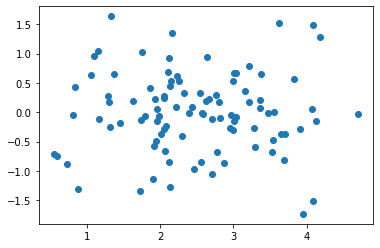

In [14]:
error = (y-y_pred).to_numpy()

plt.scatter(y_pred,error)

the constant variance assumption for the errors is met

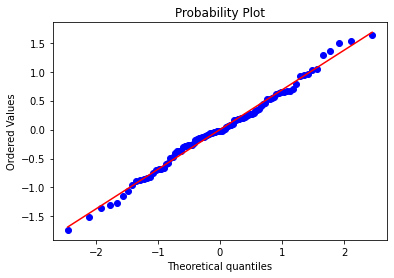

In [15]:
stats.probplot(error, dist="norm", plot=plt)
plt.show()

The approximately straight line verifies the normality for the errors.

In [16]:
influence = model2.get_influence()
leverage = influence.hat_matrix_diag
#point with high leverage = (2k+2)/n = 2*8 + 2 /97= 0.2
high_leverage = prostate[abs(leverage) > (18/97)]
high_leverage

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
31,32,0.182322,6.1076,65,1.704748,0,-1.38629,6,0,2.00821
36,37,1.423108,3.6571,73,-0.579818,0,1.65823,8,15,2.15756
40,41,0.620577,3.1420,60,-1.386294,0,-1.38629,9,80,2.29757
73,74,1.838961,3.2367,60,0.438255,1,1.17865,9,90,3.07501
91,92,2.532903,3.6776,61,1.348073,1,-1.38629,7,15,4.12955


leverages

In [17]:
leverage

array([0.07873101, 0.06758053, 0.13596177, 0.07766218, 0.03499946,
       0.08331908, 0.02989838, 0.0494461 , 0.0940149 , 0.04023404,
       0.04386826, 0.08925939, 0.04428928, 0.07318519, 0.05020755,
       0.06897432, 0.06664413, 0.08320122, 0.12212111, 0.04895576,
       0.03901634, 0.08400872, 0.04434074, 0.07206303, 0.04582684,
       0.06594655, 0.12048487, 0.06479337, 0.12707056, 0.14633177,
       0.05065029, 0.33047574, 0.09515819, 0.04280678, 0.05106283,
       0.06791041, 0.2184392 , 0.09801067, 0.06794996, 0.08106758,
       0.24100789, 0.06115256, 0.04674467, 0.09036588, 0.04262527,
       0.05037151, 0.1506595 , 0.03401242, 0.13512286, 0.05080725,
       0.09924342, 0.06415518, 0.09348895, 0.07187492, 0.13470108,
       0.05990394, 0.11665631, 0.08910835, 0.05105674, 0.05799578,
       0.07677022, 0.08328592, 0.18468066, 0.09024807, 0.06930978,
       0.03186343, 0.10275238, 0.06477415, 0.12851989, 0.10032173,
       0.07369386, 0.08242713, 0.10951482, 0.19121086, 0.09640

In [18]:
student_resid = influence.resid_studentized_external
outliers = prostate[abs(student_resid) > 2]
outliers

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
38,39,2.660959,4.0851,68,1.373716,1,1.83258,7,35,2.21375
46,47,2.727853,3.9954,79,1.879465,1,2.65676,9,100,2.56879
68,69,-0.446287,4.4085,69,-1.386294,0,-1.38629,6,0,2.96269
94,95,2.907447,3.3962,52,-1.386294,1,2.46385,7,10,5.14312
96,97,3.471967,3.9750,68,0.438255,1,2.90417,7,20,5.58293


In [19]:
C, P = influence.cooks_distance
ind= np.argsort(C)[-5:]
influential_points = prostate.loc[ind]
influential_points

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
96,97,3.471967,3.9750,68,0.438255,1,2.90417,7,20,5.58293
94,95,2.907447,3.3962,52,-1.386294,1,2.46385,7,10,5.14312
68,69,-0.446287,4.4085,69,-1.386294,0,-1.38629,6,0,2.96269
46,47,2.727853,3.9954,79,1.879465,1,2.65676,9,100,2.56879
31,32,0.182322,6.1076,65,1.704748,0,-1.38629,6,0,2.00821



use stepwise regression to remove nonsignificant predictors from the model one at a time until all predictors have p value below a certain threshhold. Start with 8 factors in this case(lcavol, lweight, age, svi, lbph, lcp, gleason, pgg45). We remove gleason first since the model output indicates that gleason is the least siginificant one. Repeat the process until all remaining predictors are significant.

***
3. For the swiss data, fit a model with Fertility as the response and the other variables as predictors. Answer the questions as in 1.

In [23]:
swiss = pd.read_csv('swiss.csv')
X = swiss[["Agriculture","Examination","Education","Catholic","Infant_Mortality"]]
y = swiss['Fertility']

In [24]:
X_c = sm.add_constant(X)
model = sm.OLS(y, X_c).fit()
y_pred = model.predict(X_c)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Fri, 06 May 2022   Prob (F-statistic):           5.59e-10
Time:                        09:36:37   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               66.9152     10.706      6.250      0.000      45.294      88.536
Agriculture         -0.1721      0.070     -2.448      0.019      -0.314      -0.030
Examination         -0.2580      0.254     -1.016      0.315      -0.771       0.255
Education           -0.8709      0.183     -4.758      0.000      -1.241      -0.501
Catholic             0.1041      0.035      2.953      0.005       0.033       0.175
Infant_Mortality     1.0770      0.382      2.822      0.007       0.306       1.848
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

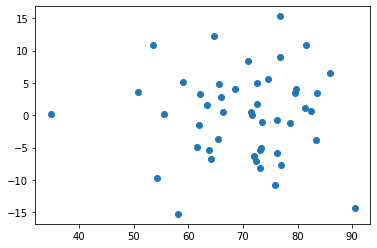

In [25]:
error = (y-y_pred).to_numpy()

plt.scatter(y_pred,error)

the constant variance assumption for the errors is met

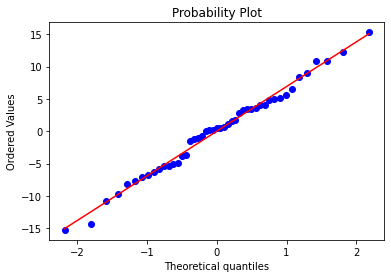

In [26]:
stats.probplot(error, dist="norm", plot=plt)
plt.show()

The approximately straight line verifies the normality for the errors.

In [27]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
#point with high leverage = (2k+2)/n = 12/47
high_leverage = swiss[abs(leverage) > (12/47)]
high_leverage

,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
18,La Vallee,54.3,15.2,31,20,2.15,10.8
44,V. De Geneve,35.0,1.2,37,53,42.34,18.0


leverages

In [28]:
leverage

array([0.15681744, 0.12258494, 0.17368296, 0.07961648, 0.07219003,
       0.19833238, 0.14308241, 0.14145774, 0.07994004, 0.10682273,
       0.13676942, 0.08319314, 0.08392561, 0.10990923, 0.12551221,
       0.106312  , 0.06853488, 0.10175031, 0.3512078 , 0.11137547,
       0.07425778, 0.08277061, 0.06410496, 0.1092143 , 0.10036242,
       0.12569646, 0.18059095, 0.07905125, 0.0532821 , 0.07706245,
       0.1733592 , 0.09204746, 0.1083415 , 0.09800616, 0.07675938,
       0.09177212, 0.1424621 , 0.081257  , 0.07683116, 0.22629672,
       0.09981583, 0.20532241, 0.07366702, 0.17219053, 0.45583631,
       0.21067014, 0.11595449])

In [29]:
student_resid = influence.resid_studentized_external
outliers = swiss[abs(student_resid) > 2]
outliers

,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
5,Porrentruy,76.1,35.3,9,7,90.57,26.6
36,Sierre,92.2,84.6,3,3,99.46,16.3
46,Rive Gauche,42.8,27.7,22,29,58.33,19.3


In [30]:
C, P = influence.cooks_distance
ind= np.argsort(C)[-5:]
influential_points = swiss.loc[ind]
influential_points

,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
45,Rive Droite,44.7,46.6,16,29,50.43,18.2
46,Rive Gauche,42.8,27.7,22,29,58.33,19.3
41,Neuchatel,64.4,17.6,35,32,16.92,23.0
36,Sierre,92.2,84.6,3,3,99.46,16.3
5,Porrentruy,76.1,35.3,9,7,90.57,26.6


use stepwise regression to remove nonsignificant predictors from the model one at a time until all predictors have p value below a certain threshhold. Start with 5 factors in this case(Agriculture, Examination, Education, Catholic, Infant Mortality). We remove infant mortality first since the model output indicates that infant mortality is the least siginificant one. Repeat the process until all remaining predictors are significant.



***
4. For divusa, data fit a model with divorce as the response and the other variables, except year as predictors. Check for serial correlation.

In [33]:
divusa = pd.read_csv('divusa.csv')
X = divusa[["unemployed","femlab","marriage","birth","military"]]
y = divusa['divorce']

In [34]:
X_c = sm.add_constant(X)
model = sm.OLS(y, X_c).fit()
y_pred = model.predict(X_c)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                divorce   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     165.1
Date:                Fri, 06 May 2022   Prob (F-statistic):           1.18e-37
Time:                        09:38:38   Log-Likelihood:                -144.71
No. Observations:                  77   AIC:                             301.4
Df Residuals:                      71   BIC:                             315.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4878      3.394      0.733      0.466      -4.279       9.255
unemployed    -0.1113      0.056     -1.989      0.051      -0.223       0.000
femlab         0.3836      0.031     12.543      0.000       0.323       0.445
marriage       0.1187      0.024      4.861      0.000       0.070       0.167
birth         -0.1300      0.016     -8.333      0.000      -0.161      -0.099
military      -0.0267      0.014     -1.876      0.065      -0.055       0.002
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   0.300
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.009
Skew:                           0.022   Prob(JB):                        0.996
Kurtosis:                       2.972   Cond. No.                     2.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check for serial correlation

In [35]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

0.29988344695130026

Since the dw statistics = 0.29988 is below 2, this means there is positive autocorrelation.

***
5. To show how two statistics that summarize how well a regression model fits, the F-ratio, and R2, the coefficient of determination relate:
a. Write down $R^2$ in terms of both Error SSE and Regression SSR.

$$R^2 = \frac{SSR}{SST}=\frac{SSR}{SSR + SSE}$$

b. Write down F-ratio in terms of Error SS, Regression SS, k, and n.


$$F-ratio = \frac{MS_{regression}}{MS_{within}}= \frac{\frac{SS_{regression}}{k}}{\frac{SS_{error}}{n-k-1}} = (\frac{n-k-1}{k})\frac{SSR}{SSE}$$

c. Establish the algebraic relationship

$$ 1-R^2 = \frac{SSE}{SSR+SSE}$$

$$\frac{R^2}{1-R^2}\frac{n-(k+1)}{k}= (\frac{n-k-1}{k})\frac{\frac{SSR}{SSR+SSE}}{\frac{SSE}{SSR+SSE}}= (\frac{n-k-1}{k})\frac{SSR}{SSE}=F-ratio$$

d. Suppose that n = 40, k = 5, and R2 = 0.20. Calculate the FRatio. Perform the usual test of model adequacy to determine whether the five explanatory variables jointly and significantly affect the response variable.


In [41]:
n = 40
k = 5
R2 = 0.2
dfn = k-1
dfd = n-k
F_ratio = (R2/(1-R2))*((n-k-1)/k)
print('F_ratio: ', F_ratio)

F_ratio:  1.7


In [42]:

crit = stats.f.ppf(q=1-0.05, dfn= dfn, dfd= dfd)
p_value = 1- stats.f.cdf(F_ratio, dfn=dfn, dfd=dfd)
print('critical value: ', crit)
print('p-value: ', p_value)

critical value:  2.641465186128566
p-value:  0.17207414000385024


the F-ratio= 1.7 smaller than the critical value 2.64, and the p-value > 0.05
we fail to reject the null hypothesis that the five explanatory variables jointly does not significantly affect the response variable. 



e. Suppose that n = 400 (not 40), k = 5, and R2 = 0.20. Calculate the FRatio.
Perform the usual test of model adequacy to determine whether the five explanatory
variables jointly and significantly affect the response variable.


In [44]:
n = 400
k = 5
R2 = 0.2
dfn = k-1
dfd = n-k
F_ratio = (R2/(1-R2))*((n-k-1)/k)
print('F_ratio: ', F_ratio)
crit = stats.f.ppf(q=1-0.05, dfn= dfn, dfd= dfd)
p_value = 1- stats.f.cdf(F_ratio, dfn=dfn, dfd=dfd)
print('critical value: ', crit)
print('p-value: ', p_value)

F_ratio:  19.7
critical value:  2.3945328958915275
p-value:  8.43769498715119e-15


The F-ratio = 19.7 > the critical value 2.39, and the p-value < 0.05. We can reject the null hypothesis that the five explanatory variables jointly does not significantly affect the response variable and conclude that the five explanatory variables jointly do significantly affect the response variable. 